In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data into a DataFrame
df = pd.read_csv("../data/train.csv", sep = ";")

# Record the target variable
target = df["Survived"]

#Determine how many null values are present for each of the attributes. 
#Attributes with a significant portion of null values can be dropped
print("Attribute and the null value count:")
for col in df.columns:
    print(col, df[col].isnull().sum())

print("*******")

#Determine the balance between the two classes within the dataset
print("Split between two available classes")
for unique in df['Survived'].unique():
    print(unique, len(df[df['Survived'] == unique]))

Attribute and the null value count:
PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 156
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 615
Embarked 1
*******
Split between two available classes
0 499
1 303


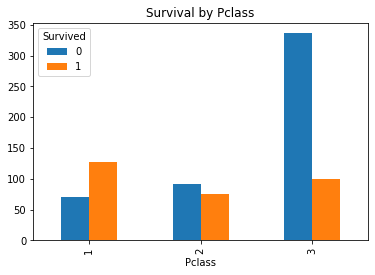

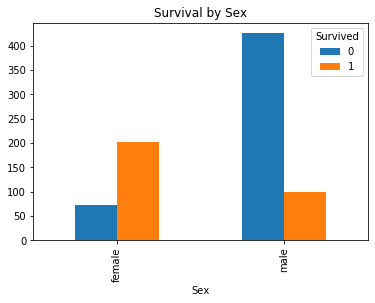

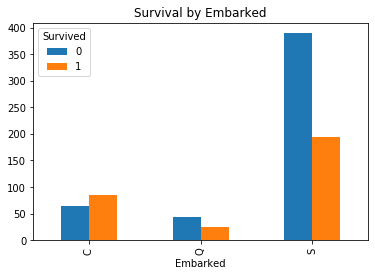

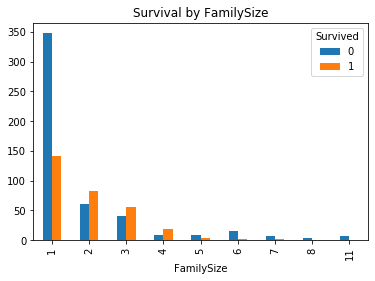

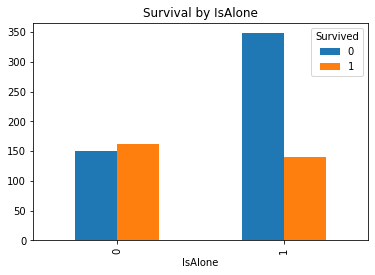

In [2]:
#Introduce two new variables - total family size and a binary flag for solo travellers
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

#Visualise survival by attribute values for attributes with few (<10 attirbutes)
cols =  ['Pclass', 'Sex', 'Embarked', 'FamilySize', 'IsAlone']

for col in cols:    
    pd.crosstab(df[col],target).plot(kind='bar')
    plt.title('Survival by ' + col)
    plt.show()

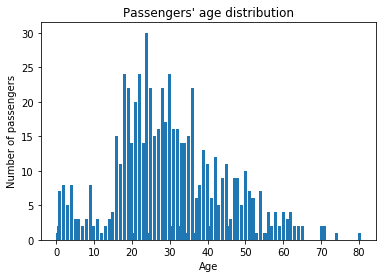

In [3]:
#Visualise the age distribution of passengers aboard the Titanic to determine the best split
ages = sorted(df['Age'].unique())
counts = []
for age in sorted(df['Age'].unique()):
    counts.append(len(df[df['Age'] == age]))

plt.figure()
plt.bar(ages, counts)
plt.ylabel("Number of passengers")
plt.xlabel("Age")
plt.title("Passengers' age distribution")
plt.show()

In [4]:
#Calculate the best split for the age attribute so that the resulting buckets are equal-sized
age_splits = []
target_age_split = (len(df['Age']) - df['Age'].isnull().sum()) / 5
current_age_split  = 0

top_age = int(max(df['Age']))

for i in range(top_age):
    lower_limit = df[df['Age'] <= current_age_split]
    upper_limit = df[df['Age'] <= i]
    
    split_size =  len(upper_limit) - len(lower_limit)
    if split_size > target_age_split:
        age_splits.append(i)
        current_age_split = i
        
print("Best values splitting the age attribute are:", age_splits)

Best values splitting the age attribute are: [19, 26, 33, 45]


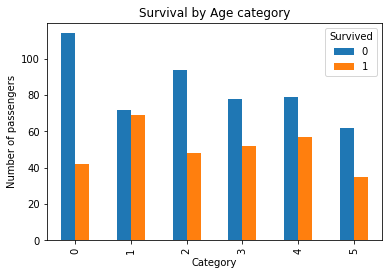

In [5]:
#Define the function used to assign categories based on age
def categorize_age(age):
    if age <= 19:
        return 1
    if age <= 26:
        return 2
    if age <= 33:
        return 3
    if age <= 45:
        return 4
    if age <= 81:
        return 5
    else:
        return 0
    
#Perform bucketization on the Age attribute
df['Age_cat'] = df['Age'].apply(categorize_age)

#Visualise the survival by age category
pd.crosstab(df['Age_cat'],target).plot(kind='bar')
plt.title('Survival by Age category')
plt.xlabel('Category')
plt.ylabel('Number of passengers')
plt.show()

In [6]:
#Calculate the best split for the fare attribute so that the resulting buckets are equal-sized
import numpy as np
fare_splits = []
target_fare_split = (len(df['Fare']) - df['Fare'].isnull().sum()) / 5
current_fare_split  = 0

top_fare = int(max(df['Fare']))

for i in np.arange(0, top_fare, 0.1):
    lower_limit = df[df['Fare'] <= current_fare_split]
    upper_limit = df[df['Fare'] <= i]
    
    split_size =  len(upper_limit) - len(lower_limit)
    if split_size > target_fare_split:
        fare_splits.append(i)
        current_fare_split = i

print("Best values splitting the fare attribute are:", fare_splits)

Best values splitting the fare attribute are: [7.9, 13.0, 26.3, 73.5]


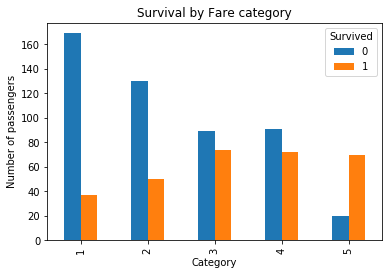

In [7]:
#Define the function used to assign categories based on age
def categorize_fare(fare):
    if fare <= 7.9:
        return 1
    if fare <= 13.0:
        return 2
    if fare <= 26.3:
        return 3
    if fare <= 73.5:
        return 4
    else:
        return 5
    
#Perform bucketization on the Fare attribute
df['Fare_cat'] = df['Fare'].apply(categorize_fare)

#Visualise the survival by fare category
pd.crosstab(df['Fare_cat'],target).plot(kind='bar')
plt.title('Survival by Fare category')
plt.xlabel('Category')
plt.ylabel('Number of passengers')
plt.show()